# Explore Your Dataset With Python and Pandas

This notebook is based on the Pandas tutorial at: https://realpython.com/pandas-python-explore-dataset/

## Environment Setup

### Installing Pandas

```console
$ python -m pip install pandas
```

```console
$ conda install pandas
```

# 1. Using the Pandas Python Library

Now that you’ve installed Pandas, it’s time to have a look at a dataset. In this tutorial, you’ll analyze NBA results provided by FiveThirtyEight in a 17MB CSV file. 

First download the data into `nba_all_elo.csv`:

In [1]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


Running the above saves the file `nba_all_elo.csv` in your current working directory.

**Note**: You could also use your web browser to download the CSV file.

However, having a download script has several advantages:
- You can tell where you got your data.
- You can repeat the download anytime! That’s especially handy if the data is often refreshed.
- You don’t need to share the 17MB CSV file with your co-workers. Usually, it’s enough to share the download script.

Now use the Pandas Python library to take a look at your data:


In [2]:
import pandas as pd
nba = pd.read_csv("nba_all_elo.csv") ## we've done this several times before
type(nba)
# Expected:
# <class 'pandas.core.frame.DataFrame'>

pandas.core.frame.DataFrame

Here, you follow the convention of importing Pandas in Python with the `pd` alias. Then, you use `.read_csv()` to read in your dataset and store it as a `DataFrame` object in the variable `nba`. 

**Note:** 

Is your data not in CSV format? No worries! The Pandas Python library provides several similar functions like `read_json()`, `read_html()`, and `read_sql_table()`. To learn how to work with these file formats, consult the docs.

You can see how much data `nba` contains:

In [3]:
len(nba)
# Expected:
# 126314

126314

In [4]:
nba.shape
# Expected:
# (126314, 23)

(126314, 23)

You use the Python built-in function `len()` to determine the number of rows. You also use the `.shape` attribute of the `DataFrame` to see its dimensionality. The result is a tuple containing the number of rows and columns.

Now you know that there are 126,314 rows and 23 columns in your dataset. But how can you be sure the dataset really contains basketball stats? You can have a look at the first five rows with `.head()`:


In [9]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


Unless your screen is quite large, your output probably won’t display all 23 columns. Somewhere in the middle, you’ll see a column of ellipses (...) indicating the missing data. If you’re working in a terminal, then that’s probably more readable than wrapping long rows. However, Jupyter notebooks will allow you to scroll. You can configure Pandas to display all 23 columns like this:

In [7]:
pd.set_option("display.max.columns", None)

While it’s practical to see all the columns, you probably won’t need six decimal places! Change it to two:

In [8]:
pd.set_option("display.precision", 2)

To verify that you’ve changed the options successfully, you can execute `.head()` again, or you can display the last five rows with `.tail()` instead:

In [10]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


#### Exercise

Can you print the last 3 lines of our `DataFrame`?

In [12]:
# Hint: look at the doc for DataFrame.tail()
nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


Similar to the Python standard library, functions in Pandas also come with several optional parameters. Whenever you bump into an example that looks relevant but is slightly different from your use case, check out the official documentation: https://pandas.pydata.org/pandas-docs/stable/. The chances are good that you’ll find a solution by tweaking some optional parameters!

# 2. Getting to Know Your Data

You’ve imported a CSV file with the Pandas Python library and had a first look at the contents of your dataset. So far, you’ve only seen the size of your dataset and its first and last few rows. Next, you’ll learn how to examine your data more systematically.

### Displaying Data Types With `.info()`

The first step in getting to know your data is to discover the different data types it contains. While you can put anything into a list, the columns of a `DataFrame` contain values of a specific data type. When you compare Pandas and Python data structures, you’ll see that this behavior makes Pandas much faster!

You can display all columns and their data types with `.info()`:


In [13]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

You’ll see a list of all the columns in your dataset and the type of data each column contains. Here, you can see the data types `int64`, `float64`, and `object`. 

Pandas uses the `NumPy` library to work with these types. Later, you’ll meet the more complex categorical data type, which the Pandas Python library implements itself.

The `object` data type is a special one. According to the Pandas Cookbook (https://realpython.com/asins/B06W2LXLQK/), the `object` data type is “a catch-all for columns that Pandas doesn’t recognize as any other specific type.” 

In practice, it often means that all of the values in the column are strings.

Although you can store arbitrary Python objects in the object data type, you should be aware of the drawbacks to doing so. Strange values in an object column can harm Pandas’ performance and its interoperability with other libraries. For more information, check out the official getting started guide (https://pandas.pydata.org/pandas-docs/stable/getting_started/).


### Showing Basic Statistics With `.describe()`

Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with `.describe()`:

In [14]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


`.describe()` only analyzes numeric columns by default, but you can provide other data types if you use the `include` parameter:

In [15]:
import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,197603050PHI,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,A,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


`.describe()` won’t try to calculate a mean or a standard deviation for the object columns, since they mostly include text strings. However, it will still display some descriptive statistics

Take a look at the `team_id` and `fran_id` columns above. Your dataset contains 104 different team IDs, but only 53 different franchise IDs. Furthermore, the most frequent team ID is `BOS`, but the most frequent franchise ID is `Lakers`. How is that possible? You’ll need to explore your dataset a bit more to answer this question.

### Exploring Your Dataset

Exploratory data analysis can help you answer questions about your dataset. For example, you can examine how often specific values occur in a column:

In [16]:
nba["team_id"]

0         TRH
1         NYK
2         CHS
3         NYK
4         DTF
         ... 
126309    CLE
126310    GSW
126311    CLE
126312    CLE
126313    GSW
Name: team_id, Length: 126314, dtype: object

In [17]:
nba["team_id"].value_counts() # team_id column
# Expected:
# BOS    5997
# NYK    5769
# LAL    5078

# SDS      11

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
TRH      60
DTF      60
PIT      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [18]:
nba["fran_id"].value_counts() # fran_id column
# Expected:
# Name: team_id, Length: 104, dtype: int64
# Lakers          6024
# Celtics         5997
# Knicks          5769

# Huskies           60
# Name: fran_id, dtype: int64

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:

In [19]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()
# Expected:
# LAL    5078
# MNL     946
# Name: team_id, dtype: int64

LAL    5078
MNL     946
Name: team_id, dtype: int64

Indeed, the Minneapolis Lakers (`"MNL"`) played 946 games. You can even find out when they played those games:

In [20]:
nba.loc[nba["team_id"] == "MNL", "date_game"]

1136     11/4/1948
1152     11/6/1948
1159     11/9/1948
1170    11/11/1948
1183    11/13/1948
           ...    
9701     3/19/1960
9702     3/20/1960
9709     3/22/1960
9711     3/24/1960
9715     3/26/1960
Name: date_game, Length: 946, dtype: object

In [21]:
nba.loc[nba["team_id"] == "MNL", "date_game"].min()
# Expected:
# '1/1/1949'

'1/1/1949'

In [22]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()
# Expected:
# '4/9/1959'

'4/9/1959'

In [23]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))
# Expected:
# min    1/1/1949
# max    4/9/1959
# Name: date_game, dtype: object

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

It looks like the Minneapolis Lakers played between the years of 1949 and 1959. (Eric's note:  These years are WRONG!!! We'll explore why in class...)

That explains why you might not recognize this team!

You’ve also found out why the Boston Celtics team `"BOS"` played the most games in the dataset. Let’s analyze their history also a little bit. 

Find out how many points the Boston Celtics have scored during all matches contained in this dataset. Expand the code block below for the solution:

#### Exercise

Find out how many points the Boston Celtics have scored during all its matches contained in this dataset.

In [26]:
# Hint: select the rows with 'team_id'==BOS, then the "pts" column.  Sum them using sum()
# 
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

You’ve got a taste for the capabilities of a Pandas `DataFrame`. In the following sections, you’ll expand on the techniques you’ve just used, but first, you’ll zoom in and learn how this powerful data structure works.

# 3.  Getting to Know Pandas' Data Structures

While a `DataFrame` provides functions that can feel quite intuitive, the underlying concepts are a bit trickier to understand. For this reason, you’ll set aside the vast NBA `DataFrame` and build some smaller Pandas objects from scratch.

### Understanding `Series` Objects


Python’s most basic data structure is the `list`, which is also a good starting point for getting to know `pandas.Series` objects. Create a new `Series` object based on a `list`:


In [27]:
revenues = pd.Series([5555, 7000, 1980],dtype='int32')
revenues
# Expected:
# 0    5555
# 1    7000
# 2    1980
# dtype: int64

0    5555
1    7000
2    1980
dtype: int32

You’ve used the list `[5555, 7000, 1980]` to create a `Series` object called `revenues`. A `Series` object wraps two components:

1. A sequence of **values**
2. A sequence of **identifiers**, which is the index

You can access these components with `.values` and `.index`, respectively:


In [28]:
revenues.values.shape
# Expected:
# array([5555, 7000, 1980])

(3,)

In [29]:
revenues.index
# Expected:
# RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=3, step=1)

`revenues.values` returns the values in the `Series`, whereas `revenues.index` returns the positional index.

**Note**: If you’re familiar with `NumPy`, then it might be interesting for you to note that the values of a `Series` object are actually n-dimensional arrays:


In [30]:
type(revenues.values)
# Expected:
# <class 'numpy.ndarray'>

numpy.ndarray

If you’re not familiar with `NumPy`, then there’s no need to worry! You can explore the ins and outs of your dataset with the Pandas Python library alone.

While `Pandas` builds on `NumPy`, a significant difference is in their **indexing**. Just like a `NumPy` array, a Pandas `Series` also has an integer index that’s implicitly defined. This implicit index indicates the element’s position in the `Series`.

However, a `Series` can also have an arbitrary type of index. You can think of this explicit index as labels for a specific row:


In [31]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

Here, the index is a list of city names represented by strings. You may have noticed that Python dictionaries use string indices as well as **keys**, and this is a handy analogy to keep in mind! You can use the code blocks above to distinguish between two types of `Series`:

1. `revenues`: This `Series` behaves like a Python `list` because it only has a positional index.
2. `city_revenues`: This `Series` acts like a Python dictionary because it features both a positional and a label index.

Here’s how to construct a `Series` with a label index from a Python dictionary:

In [32]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count
# Expected:
# Amsterdam    5
# Tokyo        8
# dtype: int64

Amsterdam    5
Tokyo        8
dtype: int64

The dictionary keys become the index, and the dictionary values are the `Series` values.

Just like dictionaries, `Series` also support `.keys()` and the `in` keyword:

In [33]:
city_employee_count.keys()
# Expected:
# Index(['Amsterdam', 'Tokyo'], dtype='object')

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [34]:
"Tokyo" in city_employee_count
# Expected:
# True

True

In [35]:
"New York" in city_employee_count
# Expected:
# False

False

### Understanding `DataFrame` Objects

While a `Series` is a pretty powerful data structure, it has its limitations. For example, you can only store one attribute per key. As you’ve seen with the nba dataset, which features 23 columns, the Pandas Python library has more to offer with its `DataFrame`. This data structure is a sequence of `Series` objects that share the same index.

If you’ve followed along with the `Series` examples, then you should already have two `Series` objects with cities as keys:

`city_revenues`  
`city_employee_count`

You can combine these objects into a `DataFrame` by providing a dictionary in the constructor. The dictionary keys will become the column names, and the values should contain the `Series` objects:

In [36]:
print(city_revenues)
print(city_employee_count)

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64
Amsterdam    5
Tokyo        8
dtype: int64


In [37]:
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})
city_data
# Expected:
# revenue  employee_count
# Amsterdam     4200             5.0
# Tokyo         6500             8.0
# Toronto       8000             NaN

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


Note how Pandas replaced the missing `employee_count` value for Toronto with `NaN`.

The new `DataFrame` index is the union of the two `Series` indices:

In [38]:
city_data.index
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Just like a `Series`, a `DataFrame` also stores its values in a `NumPy`array:

In [39]:
city_data.values
# Expected:
# array([[4.2e+03, 5.0e+00],
# [6.5e+03, 8.0e+00],
# [8.0e+03,     nan]])

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

You can also refer to the 2 dimensions of a `DataFrame` as **axes**:

In [40]:
city_data.axes
# Expected:
# [Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
# Index(['revenue', 'employee_count'], dtype='object')]

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [41]:
city_data.axes[0]
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [42]:
city_data.axes[1]
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

The axis marked with 0 is the **row index**, and the axis marked with 1 is the **column index**. This terminology is important to know because you’ll encounter several `DataFrame` methods that accept an `axis` parameter. 

A `DataFrame` is also a dictionary-like data structure, so it also supports `.keys()` and the `in` keyword. However, for a `DataFrame` these don’t relate to the index, but to the columns:


In [43]:
city_data.keys()
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

In [44]:
"Amsterdam" in city_data
# Expected:
# False

False

In [46]:
"revenue" in city_data
# Expected:
# True

True

You can see these concepts in action with the bigger NBA dataset. Does it contain a column called "points", or was it called "pts"? To answer this question, display the index and the axes of the `nba` dataset. 

As you use these methods to answer questions about your dataset, be sure to keep in mind whether you’re working with a `Series` or a `DataFrame` so that your interpretation is accurate.


#### Exercise

Display the index and the axes of the `nba` dataset:  

In [50]:
# .index, .axes
nba.index
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

Find the name of the `points` column:

In [51]:
# .info()
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

# 4. Accessing `Series` Elements

In the section above, you’ve created a Pandas `Series` based on a Python `list` and compared the two data structures. You’ve seen how a `Series` object is similar to lists and dictionaries in several ways. A further similarity is that you can use the **indexing operator (`[]`)** for `Series` as well. 

You’ll also learn how to use two Pandas-specific access methods:
1.	`.loc`
2.	`.iloc`

You’ll see that these data access methods can be much more readable than the indexing operator.


### The Benefits and Limitations of the Python Indexing Operator `[]`

### Using the Indexing Operator

Recall that a `Series` has two indices:

1.	A **positional** or **implicit index**, which is always a `RangeIndex`
2.	A **label** or **explicit index**, which can contain any hashable (i.e. immutable) objects

Next, revisit the `city_revenues` object:


In [52]:
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

You can conveniently access the values in a `Series` with both the **label** and **positional** indices:

In [53]:
# label index
city_revenues["Toronto"]
# Expected:
# 8000

8000

In [54]:
# positional index
city_revenues[1]
# Expected:
# 8000

8000

You can also use negative indices and slices, just like you would for a list:

In [55]:
# last element
city_revenues[-1]
# Expected:
# 6500

6500

In [56]:
# all but first row
city_revenues[1:]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

In [57]:
city_revenues["Toronto":]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

### Accessing `Series`' Elements via `.loc` and `.iloc`

The indexing operator (**`[]`**) is convenient, but there’s a caveat. What if the labels are also numbers? Say you have to work with a `Series` object like this:

In [58]:
colors = pd.Series(
    ["red", "purple", "blue", "green", "yellow"],
    index=[1, 2, 3, 5, 8]
)
colors
# Expected:
# 1       red
# 2    purple
# 3      blue
# 5     green
# 8    yellow
# dtype: object

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

What will `colors[1]` return? For a _positional_ index, `colors[1]` is "purple". However, if you go by the _label_ index, then `colors[1]` is referring to "red". 

The good news is, you don’t have to figure it out! Instead, to avoid confusion, the Pandas Python library provides two **data access methods**:

1.	`.loc` refers to the **label** index.
2.	`.iloc` refers to the **positional** index.

These data access methods are much more readable:

In [59]:
colors.loc[1]
# Expected:
# 'red'

'red'

In [60]:
colors.iloc[1]
# Expected:
# 'purple'

'purple'

`colors.loc[1]` returned `"red"`, the element with the label `1`. `colors.iloc[1]` returned `"purple"`, the element with the index 1.

The following figure shows which elements `.loc` and `.iloc` refer to:


![image_1.png](images/image_1.jpg )

Again, `.loc` points to the **label** index on the right-hand side of the image. Meanwhile, `.iloc` points to the **positional** index on the left-hand side of the picture. 

It’s easier to keep in mind the distinction between `.loc` and `.iloc` than it is to figure out what the indexing operator will return. Even if you’re familiar with all the quirks of the indexing operator, it can be dangerous to assume that everybody who reads your code has internalized those rules as well! 

Note: In addition to being confusing for `Series` with numeric labels, the Python indexing operator has some performance drawbacks. It’s perfectly okay to use it in interactive sessions for ad-hoc analysis, but for production code, the `.loc` and `.iloc` data access methods are preferable. For further details, check out the Pandas User Guide section on indexing and selecting data: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html  

`.loc` and `.iloc` also support the features you would expect from indexing operators, like slicing. However, these data access methods have an important difference. **While `.iloc` _excludes_ the closing element, `.loc` _includes_ it.** Take a look at this code block:


In [61]:
# Return the elements with the implicit index: 1, 2
colors.iloc[1:3]
# Expected:
# 2    purple
# 3      blue
# dtype: object

2    purple
3      blue
dtype: object

If you compare this code with the image above, then you can see that `colors.iloc[1:3]` returns the elements with the **positional** indices of 1 and 2. The closing item `"green"` with a positional index of 3 is **excluded**. 

On the other hand, `.loc` **includes** the closing element:

In [62]:
# Return the elements with the explicit index between 3 and 8
colors.loc[3:8]
# Expected:
# 3      blue
# 5     green
# 8    yellow
# dtype: object

3      blue
5     green
8    yellow
dtype: object

This code block says to return all elements with a **label index** between 3 and 8. Here, the closing item `"yellow"` has a label index of 8 and is included in the output.

You can also pass a negative positional index to `.iloc`:

In [63]:
colors.iloc[-2]
# Expected:
# 'green'

'green'

You start from the end of the `Series` and return the next-to-last element.
***
**Note**: There used to be an `.ix` indexer, which tried to guess whether it should apply positional or label indexing depending on the data type of the index. Because it caused a lot of confusion, it has been deprecated since Pandas version 0.20.0.

It’s highly recommended that you **do not use** `.ix` for indexing. Instead, **always use `.loc` for label indexing and `.iloc` for positional indexing**. For further details, check out the Pandas User Guide: 
***
You can use the code blocks above to distinguish between two `Series` behaviors:

1.	You can use `.iloc` on a `Series` similar to using `[]` on a list.
2.	You can use `.loc` on a `Serie`s similar to using `[]` on a dictionary.

Be sure to keep these distinctions in mind as you access elements of your Series objects.


# 5. Accessing `DataFrame` Elements

Since a `DataFrame` consists of `Series` objects, you can use the very same tools to access its elements. The crucial difference is the additional **dimension** of the `DataFrame`. You’ll use the indexing operator for the columns and the access methods `.loc` and `.iloc` on the rows.

### Accessing `DataFrame` columns using the Indexing operator

If you think of a `DataFrame` as a dictionary whose values are `Series`, then it makes sense that you can access its columns with the indexing operator:

In [64]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [65]:
city_data["revenue"]

# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [66]:
type(city_data["revenue"])
# Expected:
# pandas.core.series.Series

pandas.core.series.Series

Here, you use the indexing operator to select the column labeled `"revenue"`.
If the column name is a string, then you can use attribute-style accessing with dot notation as well:

In [67]:
city_data.revenue
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

`city_data["revenue"]` and `city_data.revenue` return the same output.

There’s one situation where accessing `DataFrame` elements with dot notation may not work or may lead to surprises. This is when a column name **coincides** with a `DataFrame` attribute or method name:


In [68]:
toys = pd.DataFrame([
    {"name": "ball", "shape": "sphere"},
    {"name": "Rubik's cube", "shape": "cube"}
])
toys["shape"]
# Expected:
# 0    sphere
# 1      cube
# Name: shape, dtype: object

0    sphere
1      cube
Name: shape, dtype: object

In [69]:
toys.shape
# Expected:
# (2, 2)

(2, 2)

The indexing operation `toys["shape"]` returns the correct data, but the attribute-style operation `toys.shape` still returns the shape of the `DataFrame`. 

You should only use attribute-style accessing in interactive sessions or for read operations. You **shouldn’t** use it for production code or for manipulating data (such as defining new columns).

### Accessing `DataFrame` Rows With `.loc` and `.iloc`

Similar to `Series`, a `DataFrame` also provides `.loc` and `.iloc` **data access methods**. Remember that `.loc` uses the **label** and `.iloc` the **positional index**:

In [70]:
city_data.loc["Amsterdam"]
# Expected:
# revenue           4200.0
# employee_count       5.0
# Name: Amsterdam, dtype: float64

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [71]:
city_data.loc["Tokyo": "Toronto"]
# Expected:
# revenue employee_count
# Tokyo   6500    8.0
# Toronto 8000    NaN

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [72]:
city_data.iloc[1]
# Expected:
# revenue           6500.0
# employee_count       8.0
# Name: Tokyo, dtype: float64

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

Each line of code selects a different row from city_data:

1.	`city_data.loc["Amsterdam"]` selects the row with the label index `"Amsterdam"`.
2.	`city_data.loc["Tokyo": "Toronto"]` selects the rows with label indices from `"Tokyo"` to `"Toronto"`. Remember, `.loc` is **inclusive**.
3.	`city_data.iloc[1]` selects the row with the positional index 1, which is `"Tokyo"`.

Alright, you’ve used `.loc` and `.iloc` on small data structures. Now, it’s time to practice with something bigger! Use a data access method to display the second-to-last row of the `nba` dataset. 

#### Exercise

Display the second-to-last row of the `nba` dataset.

In [74]:
# hint: use the positional index .iloc with a negative subscript
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1700.74
elo_n                 1692.09
win_equiv               59.29
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1813.63
opp_elo_n             1822.29
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

For a `DataFrame`, the data access methods `.loc` and `.iloc` also accept a second parameter. While the first parameter selects rows based on the indices, the second parameter selects the columns. You can use these parameters together to select a **subset** of rows and columns from your `DataFrame`:

In [75]:
city_data.loc["Amsterdam": "Tokyo", "revenue"]
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

Note that you separate the parameters with a comma (,). The first parameter, `"Amsterdam" : "Tokyo,"` says to select all rows between those two labels. The second parameter comes after the comma and says to select the `"revenue"` column.

It’s time to see the same construct in action with the bigger `nba` dataset.

#### Exercise

Select all games between the labels 5555 and 5559. We're interested only in two columns: one with the names of the teams and the other with the points scored by the team.

In [84]:
# Hint: .loc[rangeofrows,[columnname1,columnname2]], 
#       where rangeofrows 'slices' the indicated labels
nba.loc[pd.Series(range(5555,5560)),["team_id","pts"]]

,team_id,pts
5555,FTW,83
5556,BOS,95
5557,NYK,74
5558,ROC,81
5559,SYR,86


With data access methods like `.loc` and `.iloc`, you can select just the right subset of your `DataFrame` to help you answer questions about your dataset.

# 6. Querying Your Pandas Dataset

You’ve seen how to access subsets of a huge dataset based on its indices. Now, you’ll select rows based on the values in your dataset’s columns to **query** your data. For example, you can create a new `DataFrame` that contains only games played after 2010:

In [85]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape
# Expected:
# (12658, 23)

(12658, 23)

In [86]:
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


You still have all 23 columns, but your new `DataFrame` only consists of rows where the value in the `"year_id"` column is greater than `2010`.

You can also select the rows where a specific field is not null:

In [87]:
games_with_notes = nba[nba["notes"].notnull()]
print(games_with_notes)
games_with_notes.shape
# Expected:
# (5424, 23)

        gameorder       game_id lg_id  _iscopy  year_id   date_game  \
930           466  194801300BLB   NBA        1     1948   1/30/1948   
931           466  194801300BLB   NBA        0     1948   1/30/1948   
1084          543  194803230CHS   NBA        1     1948   3/23/1948   
1085          543  194803230CHS   NBA        0     1948   3/23/1948   
1088          545  194803250CHS   NBA        1     1948   3/25/1948   
...           ...           ...   ...      ...      ...         ...   
122207      61104  201401160ATL   NBA        0     2014   1/16/2014   
123916      61959  201411120MIN   NBA        1     2015  11/12/2014   
123917      61959  201411120MIN   NBA        0     2015  11/12/2014   
124862      62432  201501150MIL   NBA        0     2015   1/15/2015   
124863      62432  201501150MIL   NBA        1     2015   1/15/2015   

        seasongame  is_playoffs team_id       fran_id  pts    elo_i    elo_n  \
930             28            0     WSC      Capitols   71  1469.35

(5424, 23)

This can be helpful if you want to avoid any missing values in a column. You can also use `.notna()` to achieve the same goal.

You can even access values of the object data type as `str` and perform string methods on them:

In [88]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape
# Expected:
# (27797, 23)

(27797, 23)

In [89]:
ers

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.00,1305.15,41.54,BOS,Celtics,53,1300.00,1294.85,H,W,0.64,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.00,1304.69,41.49,PIT,Ironmen,51,1300.00,1295.31,H,W,0.64,NaN
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.69,1312.85,42.35,DTF,Falcons,49,1279.62,1271.46,A,W,0.39,NaN
20,11,194611070PRO,NBA,0,1947,11/7/1946,2,0,PRO,Steamrollers,73,1305.15,1311.50,42.21,CHS,Stags,65,1316.08,1309.73,H,W,0.63,NaN
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.85,1302.60,41.27,NYK,Knicks,68,1297.07,1307.32,H,L,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126304,63153,201506070GSW,NBA,1,2015,6/7/2015,98,1,CLE,Cavaliers,95,1708.17,1716.87,61.31,GSW,Warriors,93,1806.20,1797.50,A,W,0.24,NaN
126307,63154,201506090CLE,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,96,1716.87,1723.41,61.83,GSW,Warriors,91,1797.50,1790.96,H,W,0.53,NaN
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN


You use `.str.endswith()` to filter your dataset and find all games where the home team’s name ends with `"ers"`.

You can combine multiple criteria and query your dataset as well. To do this, be sure to put each one in parentheses and use the **logical** operators `|` and `&` to separate them.

Note: The operators `and`, `or`, `&&`, and `||` won’t work here. If you’re curious as to why, then check out the section on how the Pandas Python library uses Boolean operators in Python Pandas: Tricks & Features You May Not Know.

Now we search for Baltimore games where both teams scored over 100 points. In order to see each game only once, you’ll need to exclude duplicates:


In [90]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


Here, you use `nba["_iscopy"] == 0` to include only the entries that aren’t copies.
Your output should contain five eventful games.


Try to build another query with multiple criteria in the following Exercise:

#### Exercise

In the spring of 1992, both teams from Los Angeles had to play a home game at another court. Find those 2 games. (Both teams have an ID starting with "LA".)

In [100]:
# Hint: do a query similar to the previous cell:
#       search for rows in 1992 with team_id starting with 'LA' and notes not null,
#       using .str.startswith(...)
nba[(nba['year_id'] == 1992) & (nba['team_id'].str.startswith('LA')) &  (nba['notes'].notnull())]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


When you know how to query your dataset with multiple criteria, you’ll be able to answer more specific questions about your dataset.

# 7. Grouping and Aggregating Your Data

### Aggregations for `Series`

You may also want to learn other features of your dataset, like the sum, mean, or average value of a group of elements. Luckily, the Pandas Python library offers **grouping** and **aggregation functions** to help you accomplish this task.

A `Series` has more than twenty different methods for calculating descriptive statistics. Here are some examples:


In [101]:
city_revenues.sum()
# Expected:
# 18700

18700

In [102]:
city_revenues.max()
# Expected:
# 8000

8000

### Aggregations for `DataFrame`

The first method returns the total of `city_revenues`, while the second returns the max value. There are other methods you can use, like `.min()` and `.mean()`.

Remember, a column of a `DataFrame` is actually a `Series` object. For this reason, you can use these same functions on the columns of nba:


In [103]:
points = nba["pts"]
type(points)
# Expected:
# <class 'pandas.core.series.Series'>

pandas.core.series.Series

In [104]:
points.sum()
# Expected:
# 12976235

12976235

A `DataFrame` can have multiple columns, which introduces new possibilities for aggregations, like **grouping**:

In [109]:
nba.groupby("fran_id",sort=True)["pts"].mean()
# Expected:
# fran_id
# Huskies           3995
# Knicks          582497
# Stags            20398
# Falcons           3797
# Capitols         22387

fran_id
Baltimore        79.70
Bombers          71.46
Bucks           103.70
Bulls           101.53
Capitols         76.93
Cavaliers        99.85
Celtics         104.47
Clippers        101.93
Colonels        111.63
Condors         115.45
Denver           77.71
Falcons          63.28
Floridians      112.65
Grizzlies        95.16
Hawks           101.81
Heat             96.63
Hornets          94.51
Huskies          66.58
Ironmen          61.23
Jazz            102.15
Jets             74.70
Kings           103.97
Knicks          100.97
Lakers          105.82
Magic            99.43
Mavericks       102.63
Nets            101.76
Nuggets         108.20
Olympians        81.08
Pacers          103.69
Packers          86.01
Pelicans         97.96
Pistons         101.37
Raptors          96.92
Rebels           71.02
Redskins         82.65
Rockets         104.12
Sails           109.78
Sixers          103.81
Sounds          108.44
Spirits         110.52
Spurs           105.32
Squires         114.05
Sta

By default, Pandas sorts the group keys during the call to `.groupby()`. If you don’t want to sort, then pass `sort=False`. This parameter can lead to performance gains.

You can also group by multiple columns:

In [107]:
nba[
    (nba["fran_id"] == "Spurs") &
    (nba["year_id"] > 2010)
].groupby(["fran_id","year_id", "game_result"])["game_id"].count()
# Expected:
# year_id  game_result
# 2011     L              25
# W              63
# 2012     L              20
# W              60
# 2013     L              30
# W              73
# 2014     L              27
# W              78
# 2015     L              31
# W              58
# Name: game_id, dtype: int64

fran_id  year_id  game_result
Spurs    2011     L              25
                  W              63
         2012     L              20
                  W              60
         2013     L              30
                  W              73
         2014     L              27
                  W              78
         2015     L              31
                  W              58
Name: game_id, dtype: int64

#### Exercise

Let's have a look at the Golden State Warriors' season in 2014-15 (year_id: 2015). How many wins and losses did they score during the regular season and the playoffs?

In [117]:
# Mimic the previous query re Spurs' years > 2010, 
#  grouping by 'is_playoffs' instead of 'year_id'
#   and count() the result
nba[
    (nba["fran_id"] == "Warriors") &
    (nba["year_id"] == 2015)
].groupby(["fran_id",'is_playoffs','game_result'])["game_id"].count()

fran_id   is_playoffs  game_result
Warriors  0            L              15
                       W              67
          1            L               5
                       W              16
Name: game_id, dtype: int64

In the examples above, you’ve only scratched the surface of the aggregation functions that are available to you in the Pandas Python library. 

# 8. Manipulating Columns

You’ll need to know how to **manipulate** your dataset’s columns in different phases of the data analysis process. You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

Create a copy of your original `DataFrame` to work with:

In [118]:
df = nba.copy()
df.shape
# Expected:
# (126314, 23)

(126314, 23)

You can define new columns based on the existing ones:

In [119]:
df["difference"] = df.pts - df.opp_pts
df.shape
# Expected:
# (126314, 24)

(126314, 24)

In [120]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN,-8


Here, you used the `"pts"` and `"opp_pts"` columns to create a new one called `"difference"`. This new column has the same functions as the old ones:

In [121]:
df["difference"].max()
# Expected:
# 68

68

Here, you used an aggregation function `.max()` to find the largest value of your new column.

You can also rename the columns of your dataset. It seems that `"game_result"` and `"game_location"` are too verbose, so go ahead and rename them now:

In [122]:
renamed_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()
# Expected:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 126314 entries, 0 to 126313
# Data columns (total 24 columns):
# gameorder      126314 non-null int64
# ...
# location       126314 non-null object
# result         126314 non-null object
# forecast       126314 non-null float64
# notes          5424 non-null object
# difference     126314 non-null int64
# dtypes: float64(6), int64(8), object(10)
# memory usage: 23.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

Note that there’s a new object, `renamed_df`. Like several other data manipulation methods, `.rename()` returns a new `DataFrame` by default. If you want to manipulate the original `DataFrame` directly, then `.rename()` also provides an inplace parameter that you can set to `True`.

Your dataset might contain columns that you don’t need. For example, Elo ratings may be a fascinating concept to some, but you won’t analyze them in this tutorial. You can delete the four columns related to Elo:

In [123]:
df.shape
# Expected:
# (126314, 24)

(126314, 24)

In [124]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape
# Expected:
# (126314, 20)

(126314, 20)

Remember, you added the new column `"difference"` in a previous example, bringing the total number of columns to 24. When you remove the four Elo columns, the total number of columns drops to 20.

# 9. Specifying Column Data Types

When you create a new `DataFrame`, either by calling a constructor or reading a CSV file, Pandas assigns a **data type** to each column based on its values. While it does a pretty good job, it’s not perfect. If you choose the right data type for your columns upfront, then you can significantly improve your code’s performance.

Take another look at the columns of the `nba` dataset:


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

You’ll see the same output as before.

Ten of your columns have the data type `object`. Most of these `object` columns contain arbitrary text, but there are also some candidates for data type conversion. For example, take a look at the `date_game` column:

In [126]:
df["date_game"] = pd.to_datetime(df["date_game"])

Here, you use `.to_datetime()` to specify all game dates as datetime objects.
Other columns contain text that are a bit more structured. The `game_location` column can have only three different values:

In [127]:
df["date_game"].min()

Timestamp('1946-11-01 00:00:00')

In [128]:
df["game_location"].nunique()
# Expected:
# 3

3

In [129]:
# doc for above
pd.Series.nunique?

Signature: pd.Series.nunique(self, dropna: bool = True) -> int
Docstring:
Return number of unique elements in the object.

Excludes NA values by default.

Parameters
----------
dropna : bool, default True
    Don't include NaN in the count.

Returns
-------
int

See Also
--------
DataFrame.nunique: Method nunique for DataFrame.
Series.count: Count non-NA/null observations in the Series.

Examples
--------
>>> s = pd.Series([1, 3, 5, 7, 7])
>>> s
0    1
1    3
2    5
3    7
4    7
dtype: int64

>>> s.nunique()
4
File:      c:\users\shiva\anaconda3\lib\site-packages\pandas\core\base.py
Type:      function


In [130]:
df["game_location"].value_counts()
# Expected:
# A    63138
# H    63138
# N       38
# Name: game_location, dtype: int64

A    63138
H    63138
N       38
Name: game_location, dtype: int64

In [131]:
# doc for above
pd.Series.value_counts?

Signature:
pd.Series.value_counts(
    self,
    normalize: bool = False,
    sort: bool = True,
    ascending: bool = False,
    bins=None,
    dropna: bool = True,
)
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : bool, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : bool, default True
    Sort by frequencies.
ascending : bool, default False
    Sort in ascending order.
bins : int, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : bool, default True
    Don't include counts of NaN.

Returns
-------
Series

See Also
--------
Series.count: Number of non-NA elements in a Series.
DataFrame.count: Number of non-NA elements in a 

Which data type would you use in a relational database for such a column? You would probably not use a `varchar` type, but rather an `enum`. Pandas provides the **`Categorical`** data type for the same purpose:

In [132]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.31,GSW,Warriors,103,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01,CLE,Cavaliers,91,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01,GSW,Warriors,104,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29,GSW,Warriors,105,H,L,0.48,NaN,-8


In [133]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype
# Expected:
# CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [135]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.31,GSW,Warriors,103,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01,CLE,Cavaliers,91,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01,GSW,Warriors,104,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29,GSW,Warriors,105,H,L,0.48,NaN,-8


**`Categorical` data** has a few advantages over unstructured text. When you specify the `categorical` data type, you make validation easier and save a ton of memory, as Pandas will only use the unique values internally. The higher the ratio of total values to unique values, the more space savings you’ll get.

Run `df.info()` again. You should see that changing the `game_location` data type from `object` to `categorical` has decreased the memory usage.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

Note: The `categorical` data type also gives you access to additional methods through the `.cat` accessor. To learn more, check out the official docs.

You’ll often encounter datasets with too many text columns. An essential skill for data scientists to have is the ability to spot which columns they can convert to a more performant data type. 

Take a moment to practice this now in the following Exercise:

#### Exercise

Find another column in the `nba` dataset that has a generic data type and convert it to a more specific one.

In [137]:
# Hint: game_result!  pd.Categorical('game_result column query')
df["game_result"] = pd.Categorical(df["game_result"])
df["game_result"].dtype


CategoricalDtype(categories=['L', 'W'], ordered=False)

As you work with more massive datasets, memory savings becomes especially crucial. Be sure to keep **performance** in mind as you continue to explore your datasets.

# 10. Cleaning Data

You may be surprised to find this section so late in the tutorial! Usually, you’d take a critical look at your dataset to fix any issues before you move on to a more sophisticated analysis. However, in this tutorial, you’ll rely on the techniques that you’ve learned in the previous sections to clean your dataset.

### Missing Values

Have you ever wondered why `.info()` shows how many non-null values a column contains? The reason why is that this is vital information. Null values often indicate a problem in the data-gathering process. They can make several analysis techniques, like different types of machine learning, difficult or even impossible.

When you inspect the `nba` dataset with `nba.info()`, you’ll see that it’s quite neat. Only the column notes contains `null` values for the majority of its rows:

In [138]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

This output shows that the notes column has only 5424 non-null values. That means that over 120,000 rows of your dataset have null values in this column.
Sometimes, the easiest way to deal with records containing missing values is to ignore them. You can remove all the rows with missing values using `.dropna()`:

In [139]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape
# Expected:
# (5424, 23)

(5424, 23)

In [140]:
rows_without_missing_data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,71,1469.35,1454.90,47.07,BLB,Baltimore,95,1434.05,1448.50,A,L,0.41,at Baltimore's Fifth Regiment Armory
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,95,1434.05,1448.50,46.41,WSC,Capitols,71,1469.35,1454.90,H,W,0.59,at Baltimore's Fifth Regiment Armory
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,70,1465.90,1461.20,47.71,CHS,Stags,74,1440.72,1445.42,A,L,0.39,Tiebreaker
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,74,1440.72,1445.42,46.09,WSC,Capitols,70,1465.90,1461.20,H,W,0.61,Tiebreaker
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,75,1477.26,1484.31,50.04,CHS,Stags,72,1445.42,1438.36,A,W,0.40,Tiebreaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,1/16/2014,39,0,ATL,Hawks,110,1505.05,1487.59,39.24,BRK,Nets,127,1454.65,1472.11,N,L,0.57,"at London, England"
123916,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,113,1635.77,1642.45,54.89,MIN,Timberwolves,101,1502.92,1496.24,N,W,0.68,"at Mexico City Arena, Mexico City, Mexico"
123917,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,101,1502.92,1496.24,40.13,HOU,Rockets,113,1635.77,1642.45,N,L,0.32,"at Mexico City Arena, Mexico City, Mexico"
124862,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,95,1499.90,1505.86,41.14,NYK,Knicks,79,1304.46,1298.50,N,W,0.75,"at The O2, London, England"


Of course, this kind of data cleanup doesn’t make sense for your nba dataset, because it’s not a problem for a game to lack notes. But if your dataset contains a million valid records and a hundred where relevant data is missing, then dropping the incomplete records can be a reasonable solution.

You can also drop problematic columns if they’re not relevant for your analysis. To do this, use `.dropna()` again and provide the `axis=1` parameter:

In [141]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape
# Expected:
# (126314, 22)

(126314, 22)

Now, the resulting `DataFrame` contains all 126,314 games, but not the sometimes empty notes column.

If there’s a meaningful default value for your use case, then you can also replace the missing values with that:

In [142]:
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)
data_with_default_notes["notes"].describe()
# Expected:
# count              126314
# unique                232
# top       no notes at all
# freq               120890
# Name: notes, dtype: object

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [143]:
data_with_default_notes

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,no notes at all
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,no notes at all
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,no notes at all
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,no notes at all
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,no notes at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,no notes at all
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,no notes at all
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,no notes at all
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,no notes at all


Here, you fill the empty notes rows with the string `"no notes at all"`.


### Invalid Values

Invalid values can be even more dangerous than missing values. Often, you can perform your data analysis as expected, but the results you get are peculiar. This is especially important if your dataset is enormous or used manual entry. Invalid values are often more challenging to detect, but you can implement some sanity checks with queries and aggregations.

One thing you can do is validate the ranges of your data. For this, `.describe()` is quite handy. Recall that it returns the following output:

In [144]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


The `year_id` varies between `1947` and `2015`. That sounds plausible.
What about `pts`? How can the minimum be `0`? Let’s have a look at those games:

In [145]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


This query returns a single row and it seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

### Inconsistencies Between Values in Different Columns

Sometimes a value would be entirely realistic in and of itself, but it doesn’t fit with the values in the other columns. You can define some query criteria that are mutually exclusive and verify that these don’t occur together.

In the NBA dataset, the values of the fields `pts`, `opp_pts` and `game_result` should be consistent with each other. You can check this using the `.empty` attribute:

In [146]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty
# Expected:
# True

True

In [147]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty
# Expected:
# True

True

Fortunately, both of these queries return an empty `DataFrame`.

Be prepared for surprises whenever you’re working with raw datasets, especially if they were gathered from different sources or through a complex pipeline. You might see rows where a team scored more points than their opponent, but still didn’t win—at least, according to your dataset! To avoid situations like this, make sure you add further data cleaning techniques to your Pandas and Python arsenal.

# 11. Working With Multiple Datasets in Pandas

### Combining Data Based on the Index With `concat()`

In the previous section, you’ve learned how to clean a messy dataset. Another aspect of real-world data is that it often comes in multiple pieces. In this section, you’ll learn how to grab those pieces and combine them into one dataset that’s ready for analysis.

Earlier, you combined two `Series` objects into a `DataFrame` based on their indices. Now, you’ll take this one step further and use `.concat()` to combine `city_data` with another `DataFrame`. Say you’ve managed to gather some data on two more cities:


In [150]:
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [151]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"]
)
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data
# Expected:
# Amsterdam   4200    5.0
# Tokyo       6500    8.0
# Toronto     8000    NaN
# New York    7000    2.0
# Barcelona   3400    2.0

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


This second `DataFrame` contains info on the cities `"New York"` and `"Barcelona"`.
You can add these cities to `city_data` using `.concat()`:


In [152]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data
# Expected:
# revenue  employee_count  country  capital
# Amsterdam     4200             5.0  Holland        1
# Tokyo         6500             8.0    Japan        1
# Toronto       8000             NaN   Canada        0
# Barcelona     3400             2.0    Spain        0

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


Now, the new variable `all_city_data` contains the values from both `DataFrame` objects.

Note: As of Pandas version 0.25.0, the `sort` parameter’s default value is `True`, but this will change to `False` soon. It’s good practice to provide an explicit value for this parameter to ensure that your code works consistently in different Pandas and Python versions. For more info, consult the Pandas User Guide.

By default, `concat()` combines along `axis=0`. In other words, it appends rows. You can also use it to append columns by supplying the parameter `axis=1`:


In [153]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [154]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities
# Expected:
# revenue  employee_count  country  capital
# Amsterdam   4200.0             5.0  Holland      1.0
# Tokyo       6500.0             8.0    Japan      1.0
# Toronto     8000.0             NaN   Canada      0.0
# New York    7000.0             2.0      NaN      NaN
# Barcelona   3400.0             2.0    Spain      0.0
# Rotterdam      NaN             NaN  Holland      0.0

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


Note how Pandas added `NaN` for the missing values. If you want to combine only the cities that appear in both `DataFrame` objects, then you can set the `join` parameter to `inner`:

In [155]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")
#            revenue  employee_count  country  capital
# Amsterdam     4200             5.0  Holland        1
# Tokyo         6500             8.0    Japan        1
# Toronto       8000             NaN   Canada        0
# Barcelona     3400             2.0    Spain        0

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


### Combining Data Based on Arbitrary Columns With `merge()`

While it’s most straightforward to combine data based on the index, it’s not the only possibility. You can use `.merge()` to implement a `join` operation similar to the one from SQL:

In [156]:
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
}, index= ["Holland", "Japan", "Canada"])

Here, you pass the parameter `left_on="country"` to `.merge()` to indicate what column you want to join on. The result is a bigger `DataFrame` that contains not only city data, but also the population and continent of the respective countries:

In [157]:
pd.merge(cities, countries, left_on="country", right_index=True)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


Note that the result contains only the cities where the country is known and appears in the joined `DataFrame`.

`.merge()` performs an inner join by default. If you want to include all cities in the result, then you need to provide the `how` parameter:

In [158]:
pd.merge(
    cities,
    countries,
    left_on="country",
    right_index=True,
    how="left"
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


With this `left` join, you’ll see all the cities, including those without country data.

Welcome back, New York & Barcelona!

# 12. Visualizing Your Pandas DataFrame

Data visualization is one of the things that works much better in a Jupyter notebook than in a terminal.

Include the following line to show plots directly in the notebook:

In [159]:
%matplotlib inline

Both `Series` and `DataFrame` objects have a `.plot()` method, which is a wrapper around `matplotlib.pyplot.plot()`. By default, it creates a **line plot**. 

Visualize how many points the Knicks scored throughout the seasons:

<AxesSubplot:xlabel='year_id'>

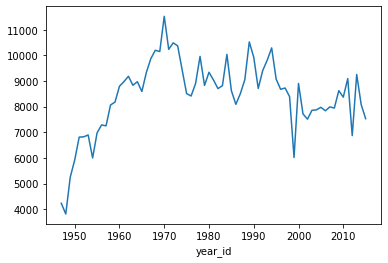

In [160]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

This shows a line plot with several peaks and two notable valleys around the years 2000 and 2010.

You can also create other types of plots, like a bar plot:

In [161]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

<AxesSubplot:>

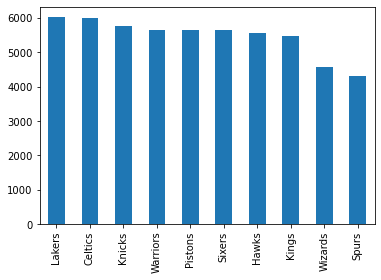

In [162]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

This shows the franchises with the most games played.

The Lakers are leading the Celtics by a minimal edge, and there are six further teams with a game count above 5000.

Now try a more complicated exercise:

#### Exercise

In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season.

<AxesSubplot:ylabel='game_result'>

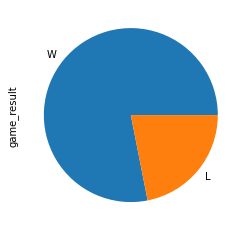

In [174]:
# Hint: select out entries for fran_id=="Heat" and year_id==2013
# Then plot as in the previous cell...

nba.loc[(nba['fran_id'] == "Heat") & (nba['year_id'] == 2013)]["game_result"].value_counts().plot(kind="pie")


# 13. Conclusion and Further Resources

In this tutorial, you’ve learned how to start **exploring a dataset** with the Pandas Python library. You saw how you could access specific rows and columns to tame even the largest of datasets. Speaking of taming, you’ve also seen multiple techniques to prepare and clean your data, by specifying the data type of columns, dealing with missing values, and more. You’ve even created queries, aggregations, and plots based on those.

Now you can:

•   Work with `Series` and `DataFrame` objects  
•   Subset your data with `.loc`, `.iloc`, and the indexing operator  
•	Answer questions with queries, grouping, and aggregation  
•	Handle missing, invalid, and inconsistent data  
•	Visualize your dataset in a Jupyter notebook

This journey using the NBA stats only scratches the surface of what you can do with the Pandas Python library. You can power up your project with Pandas tricks, learn techniques to speed up Pandas in Python, and even dive deep to see how Pandas works behind the scenes. There are many more features for you to discover, so get out there and tackle those datasets! 